# Week 2 - Distribution Plots
This week we will continue to build on the ggplot features we went through last week and apply them to new distribution plots including violin plots, histograms, density plots, and ridgeline plots.

### Contents
1. [Violin plots](#1)
2. [Histograms](#2)
3. [Density plots](#3)

Before we start let's load the packages we need for today and import the iris dataset we worked with last week.

In [1]:
library(ggplot2)
library(ggridges)
library(viridis)
library(datasets)

Loading required package: viridisLite



In [2]:
data(iris)

Next, before plotting let's set our theme for todays plots. This will set the background to white with no gridlines.

In [3]:
theme_set(theme_bw() + theme(panel.grid = element_blank()))

<a id="1"></a>
### Violin plots
Violin plots are useful for data with a lot of samples per group to better visualize the distribution of those points that might otherwise be lost from looking at a box plot alone. Below is the code for a basic violin plot with fill color by Species.

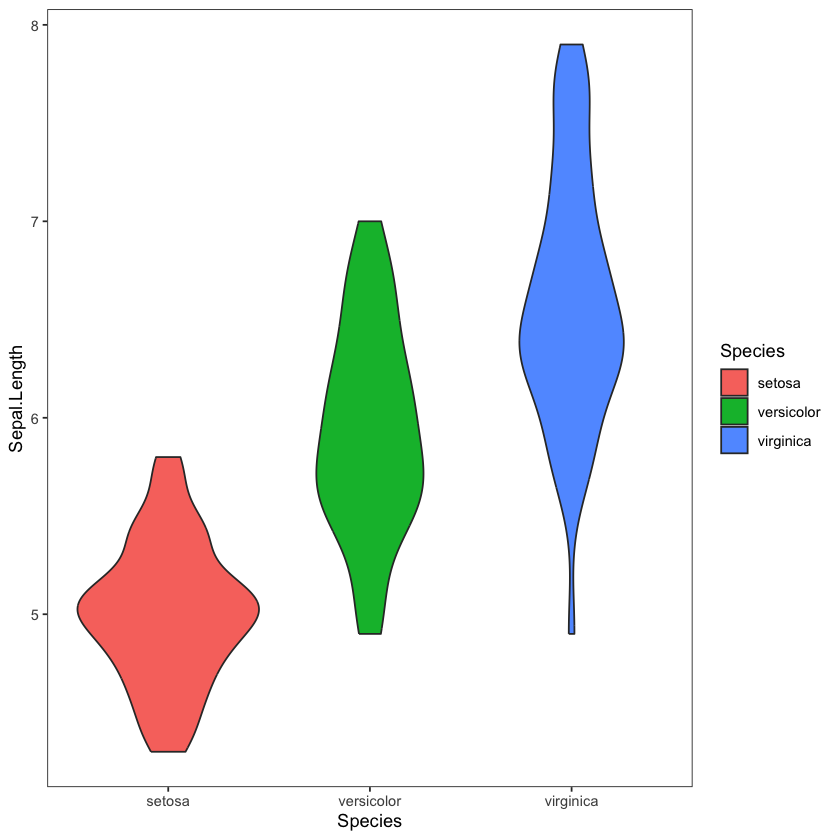

In [4]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin()

Next, we add a box plot on top of our violin plot to provide additional statistical information to the graph. By combining these graphs we provide both statistical information like mean and range as well as information on how those data points are distributed. The default box plot will be the same width as the violins, so you use `width` to adjust the box appearance so it fits inside of the violin.

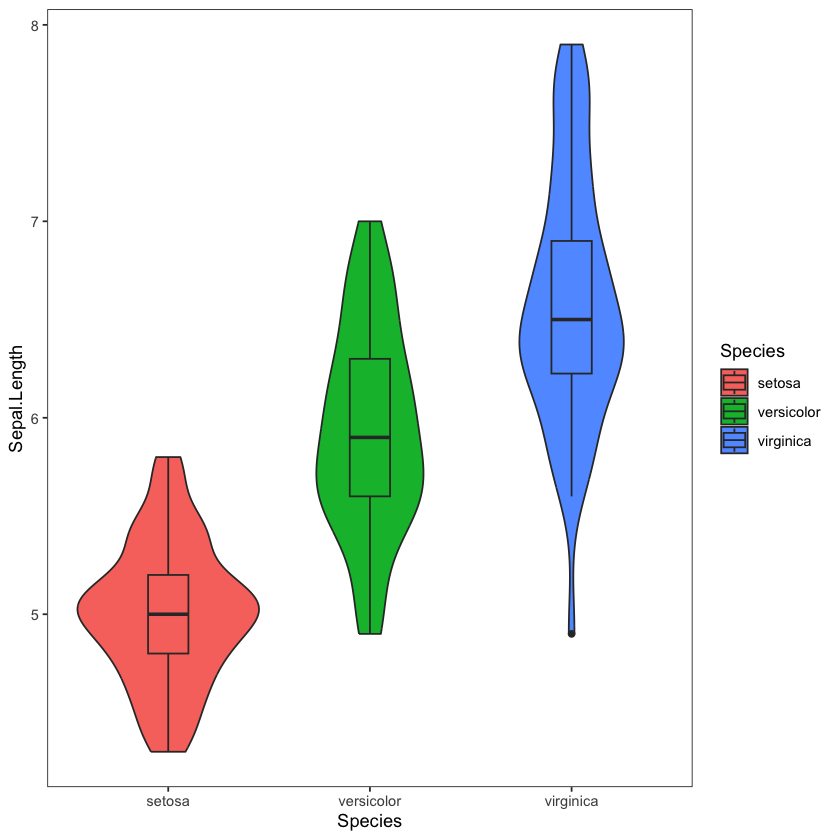

In [5]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin() + geom_boxplot(width = 0.2)

Adjusting the opacity of the violins or boxes may help for aesthetic purposes. We do that using `alpha`. Here, we set `alpha` to 0.5 for both the boxplot and the violin which makes each 50% transparent.

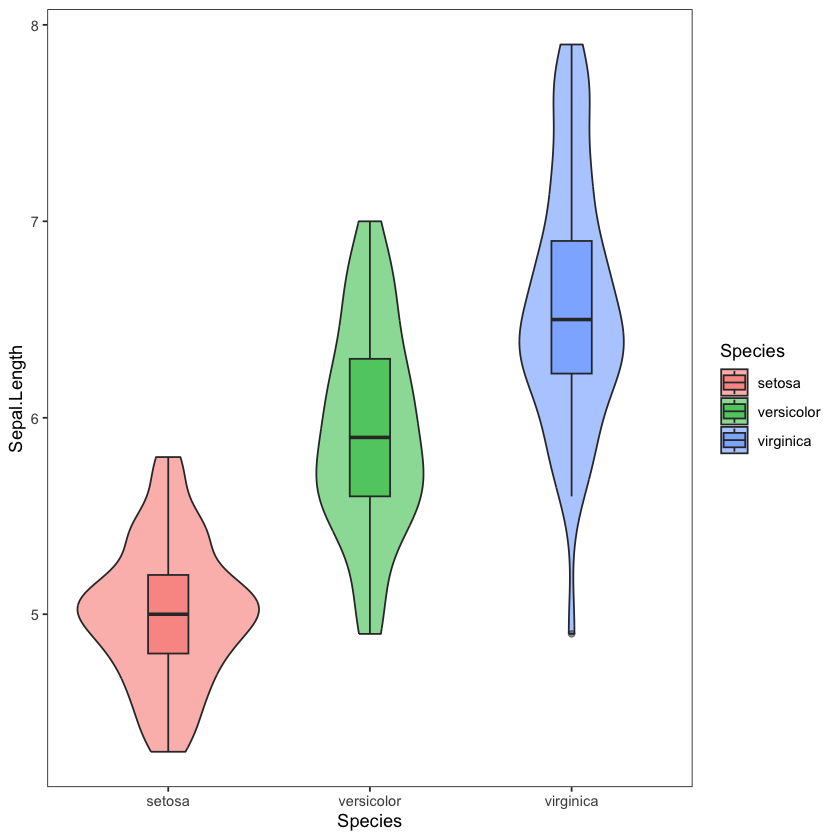

In [6]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin(alpha = 0.5) + 
geom_boxplot(width = 0.2, alpha = 0.5)

Next we add in the data points to the graph. Just as we did with the box plot last week, we do this using `geom_point()`. The default point will be a solid color with no fill and the points will be stacked directly in line with one another at their y coordinate. The make sure points don't completely overlap we use `position = "jitter"`. However, the default jitter will be as wide as the violin and can look chaotic. So to control the spacing of the jitter we set position using `position = position_jitter(width = 0.1)`. This restricts the width the points are allowed to jitter presenting a cleaner appearance. The width value can be set as any value greater than 0 including decimals but usually it's best to set it between 0 and 1.

The other variables presented below in `geom_point()` adjust the size and shape of the points. Just like width, size can be any number greater than 0. Shape is set using the `pch` variable. To figure out which shape to use, I provided a link below for a website that indicates the values for each shape type in R. Shapes 0-14 are shapes that have a outline but no fill, shapes 15-20 are only color with no fill, and shapes 21-25 are shapes with outline and fill. Below I show how changing the shape to a circle with outline and fill will then make the points color by Species, since we designated fill by Species in the `ggplot()` portion of the command. Points with outlines and fill can be nice because the outline provides contrast against the background and makes it easier to see slightly overlapping points. 

*R shape reference*

http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r

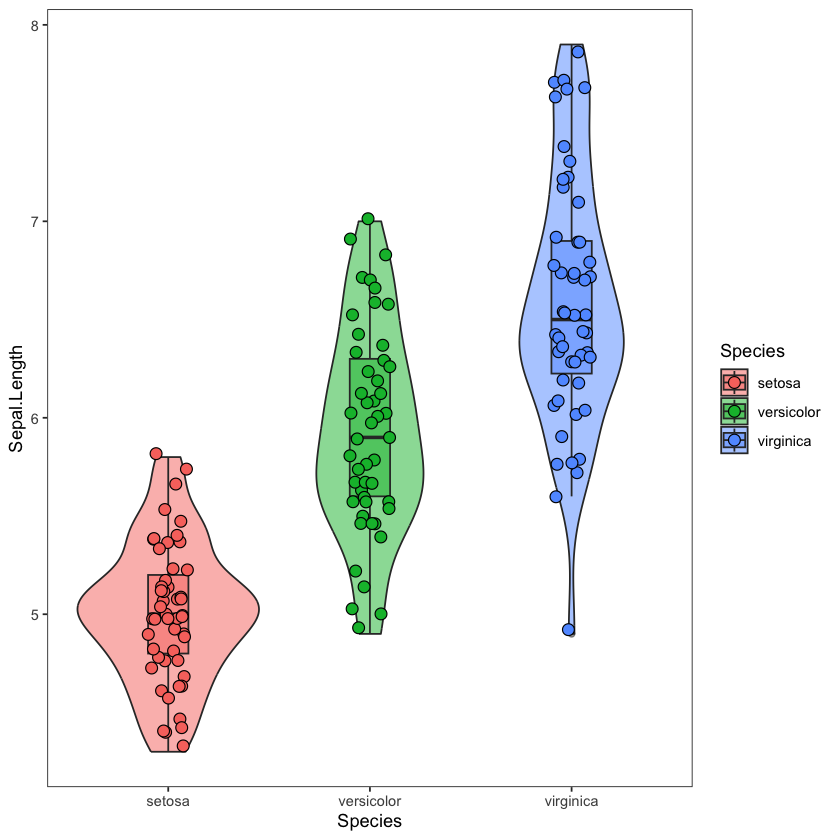

In [7]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin(alpha = 0.5) + 
geom_boxplot(width = 0.2, alpha = 0.5) + geom_point(position = position_jitter(width = 0.1), pch = 21, size = 3)

The next coupe plot commands, focus on setting colors other than the default ones to our variables. We can either do this using premade palettes or by choosing our own colors. First, we are going to set our colors using premade palettes from R Color Brewer. Below is a link to a website that displays the different palettes and names for options. To set color scheme using a palette, we use `scale_fill_brewer()`. Inside `scale_fill_brewer()` all we have to do is provide the name of a palette and the colors from that palette will automatically fill in. 

*R Color Brewer Palettes*

https://r-graph-gallery.com/38-rcolorbrewers-palettes.html

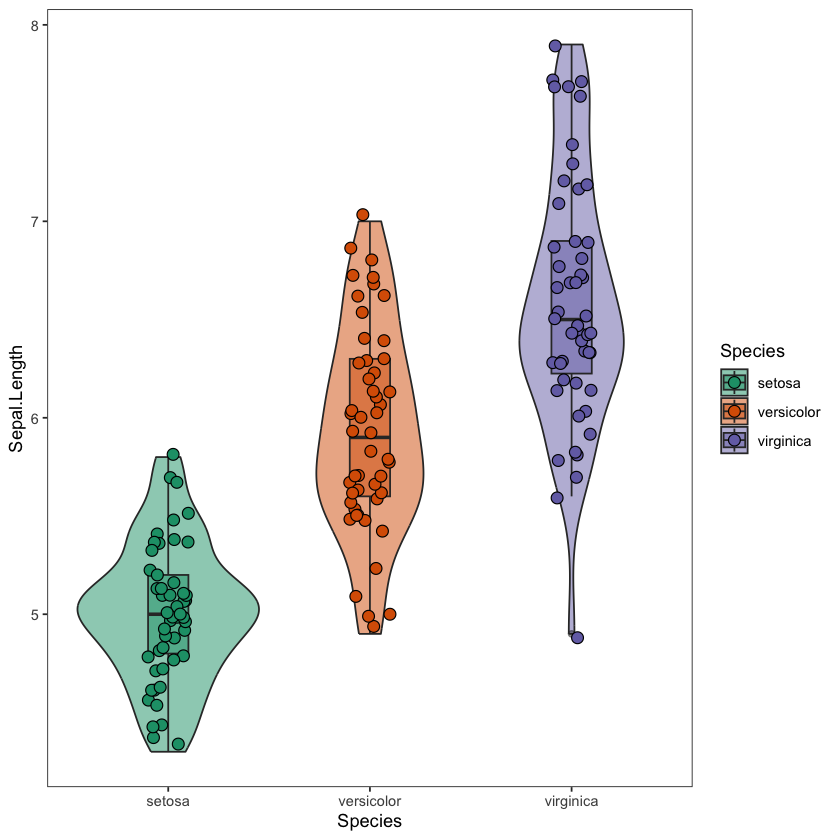

In [8]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin(alpha = 0.5) + 
geom_boxplot(width = 0.2, alpha = 0.5) + geom_point(position = position_jitter(width = 0.1), pch = 21, size = 3) +
scale_fill_brewer(palette = "Dark2")

Next we will set a custom color palette from colors we choose. Below I have included links to color websites I introduced in our first week that can used to pick color schemes. Once we have our colors picked, we provide them as hex codes to `scale_fill_manual()` in a vector. A vector refers to a list of items (strings, characters, numbers, etc.) and can be defined as a comma separated list within `c()` in R.

*Color websites*

https://www.colorsupplyyy.com/app

https://color.adobe.com/create/color-wheel

https://medialab.github.io/iwanthue/

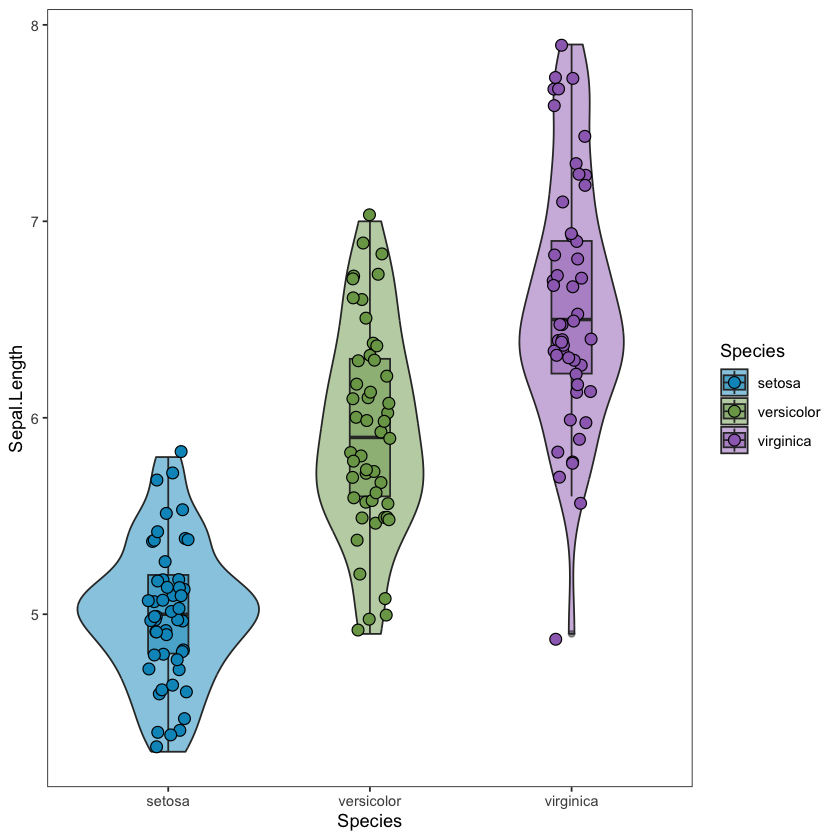

In [9]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin(alpha = 0.5) + 
geom_boxplot(width = 0.2, alpha = 0.5) + geom_point(position = position_jitter(width = 0.1), pch = 21, size = 3) +
scale_fill_manual(values = c("#0096c4","#7aa457","#9e6ebd"))

In the case you want certain colors assigned to certain species we can also do that within the `scale_fill_manual()` command by placing the name of the species in single quotations and an equal sign immediately before each hex code. Below I designate each species to a fill color which then changes the order in which the colors fill.

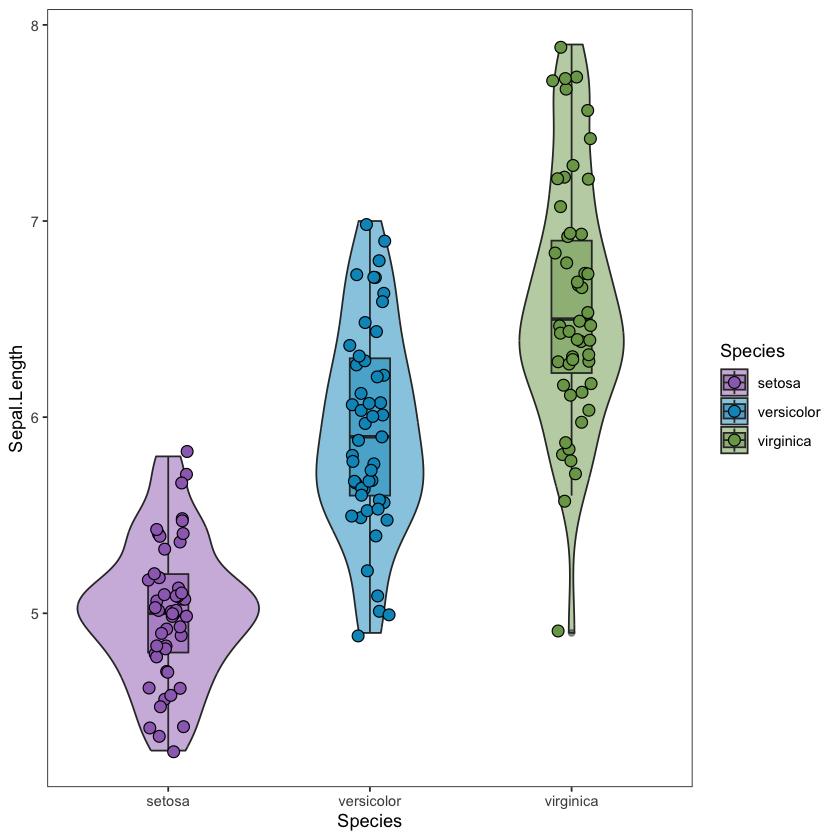

In [10]:
ggplot(iris, aes(Species, Sepal.Length, fill = Species)) + geom_violin(alpha = 0.5) + 
geom_boxplot(width = 0.2, alpha = 0.5) + geom_point(position = position_jitter(width = 0.1), pch = 21, size = 3) +
scale_fill_manual(values = c('versicolor' = "#0096c4",
                             'virginica' = "#7aa457",
                             'setosa' = "#9e6ebd"))

The `scale_fill_brewer()` and `scale_fill_manual()` features also work for other variables you may be trying to code in the exact same way. You simply substitute fill for a different variable name and adjust the designation inside of the parentheses. Other examples would be `scale_color_manual()`, `scale_size_manual()`, `scale_shape_manual()`, etc.

<a id="2"></a>
### Histograms
Histograms in ggplot are very simple and follow the same format as other graphs above except that they only take an x variable. Here we plot the distribution of Sepal.Length in the iris dataset. When `bins` is not provided, ggplot will choose a default bin size for you, or you can designate how many bins you want as shown in the command below.

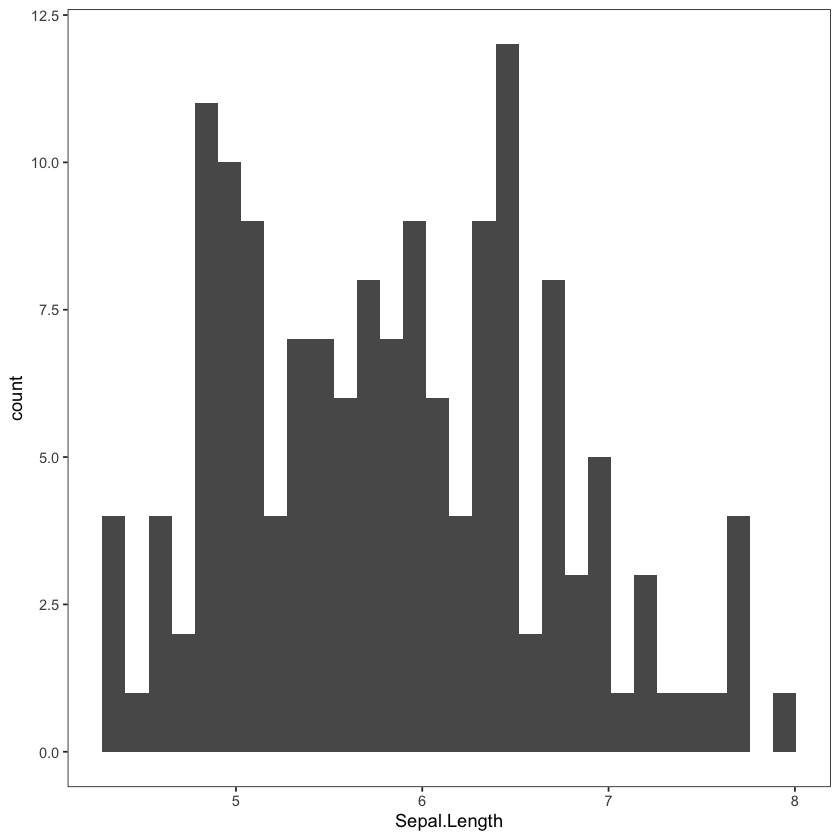

In [11]:
ggplot(iris, aes(x = Sepal.Length)) + geom_histogram(bins = 30)

Just like with our other plots we can also, fill our histogram by Species.

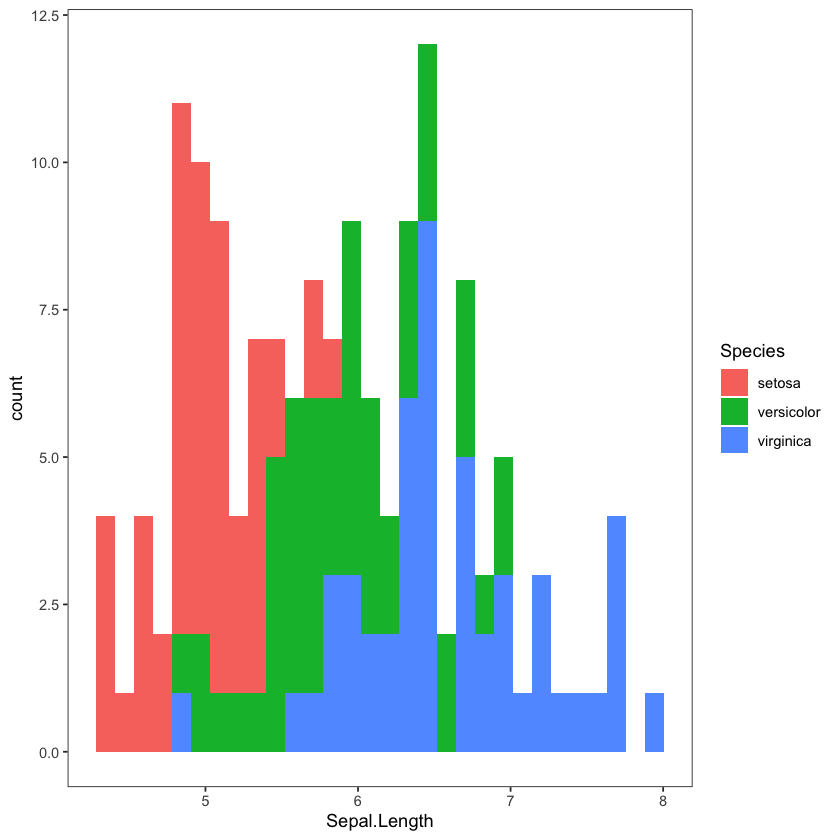

In [12]:
ggplot(iris, aes(x = Sepal.Length, fill = Species)) + geom_histogram(bins = 30)

<a id="3"></a>
### Density plots
Density plots are very similar to histograms but plot as curves as opposed to boxes. Here we plot the density of the whole dataset with one fill color.

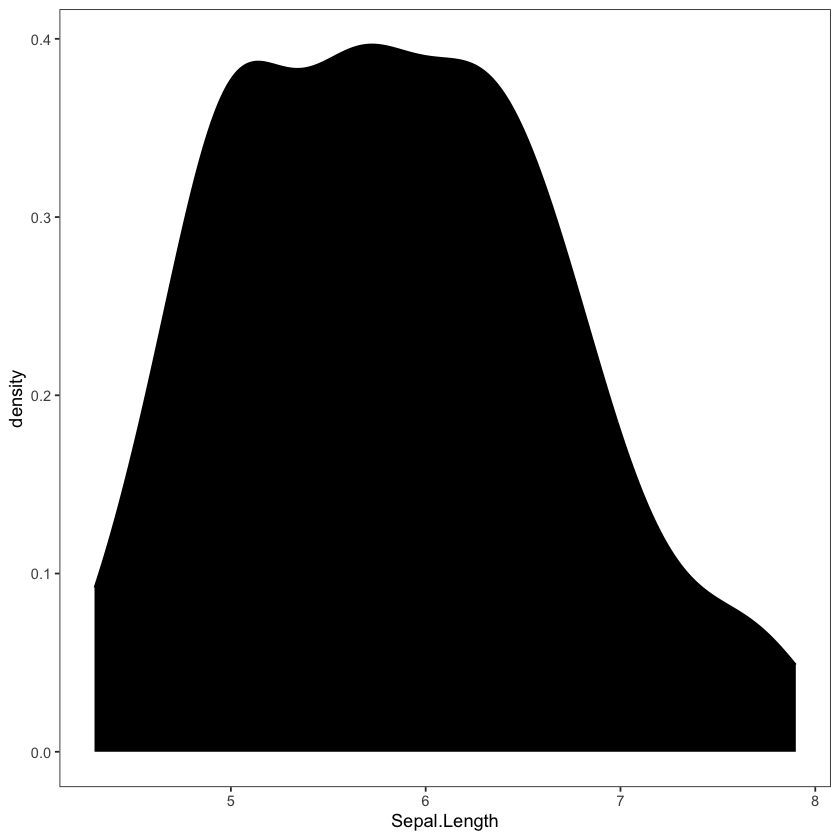

In [13]:
ggplot(iris, aes(x = Sepal.Length)) + geom_density(fill = "black")

Again, we can separate these by Species and this will provide us with three separate density curves, one for each species.

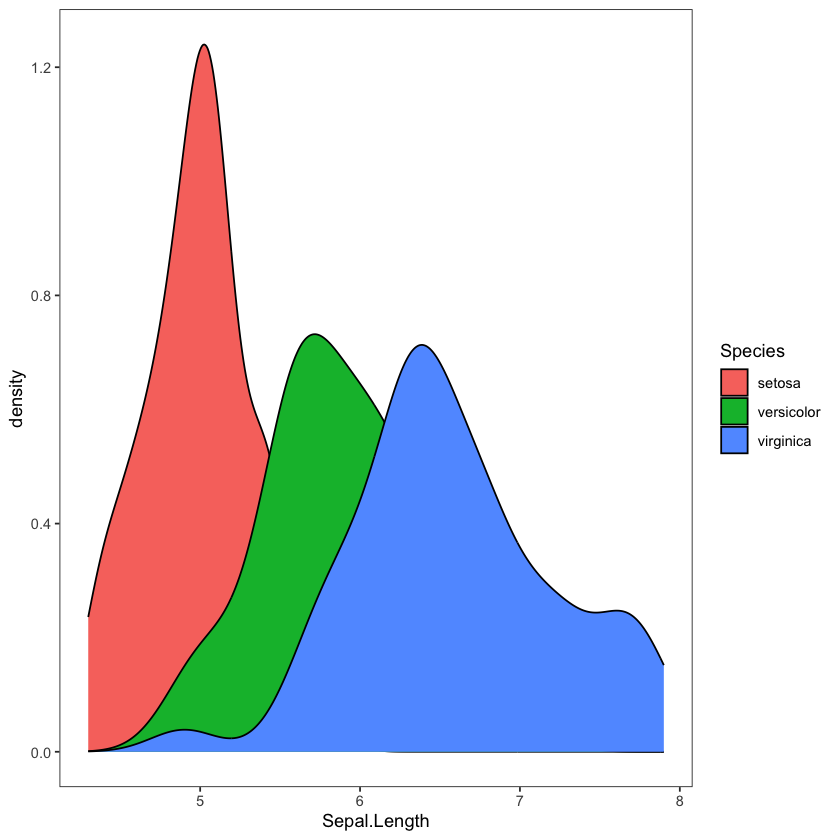

In [14]:
ggplot(iris, aes(x = Sepal.Length, fill = Species)) + geom_density()